# K-Nearest-Neighbors

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error 

## (1) Loading Dataset

In [2]:
df = pd.read_csv("../data/metrics/ML_Houses_clean.csv")
df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


In [3]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1460 non-null   float64
 1   BedroomAbvGr  1460 non-null   float64
 2   KitchenAbvGr  1460 non-null   float64
 3   OverallCond   1460 non-null   float64
 4   CentralAir    1460 non-null   int64  
 5   SalePrice     1460 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 68.6 KB


## (2) Default KNN

In [28]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

KNN_regressor = KNeighborsRegressor()
scores = cross_validate(KNN_regressor, X, y)

base_knn_score = scores['test_score'].mean()
base_knn_score

np.float64(0.6086269321400684)

## (3) Scale sensitivity

In [31]:
mm_scaler = MinMaxScaler()
X_rescaled = mm_scaler.fit_transform(X)

KNN_regressor = KNeighborsRegressor()
scores = cross_validate(KNN_regressor, X_rescaled, y)

rescaled_score = scores['test_score'].mean()
rescaled_score

np.float64(0.649019431450802)

## (4) Optimizing $k$

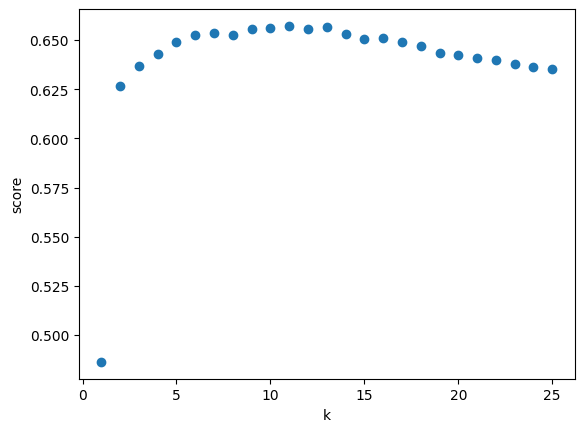

In [42]:
mm_scaler = MinMaxScaler()
X_rescaled = mm_scaler.fit_transform(X)

score_avg = []
neighbours = []
for k in range(1, 26):
    KNN_regressor = KNeighborsRegressor(n_neighbors = k)
    cv_results = cross_validate(KNN_regressor, X_rescaled, y)

    neighbours.append(k)
    score_avg.append(cv_results['test_score'].mean())

plt.scatter(neighbours, score_avg)
plt.xlabel('k')
plt.ylabel('score')
plt.show()

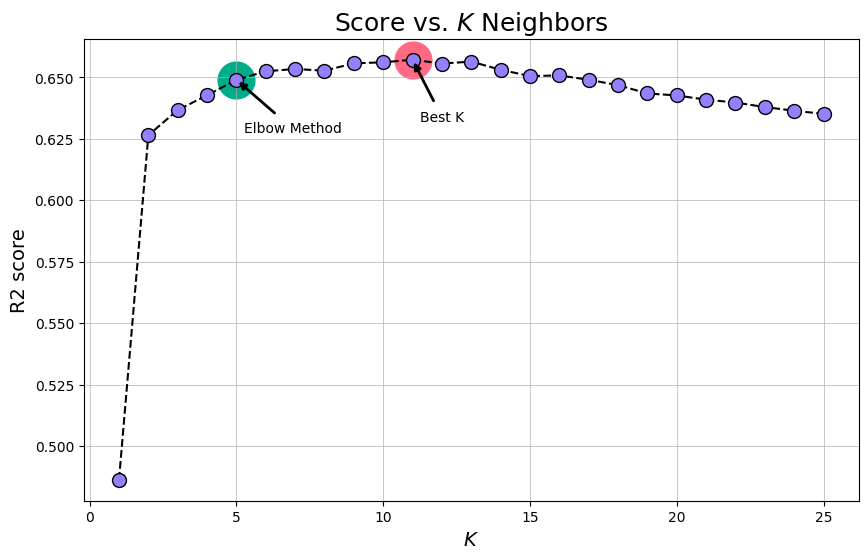

In [ ]:
# Plot the evolution of the score below

with plt.style.context('fast'):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.plot(neighbours, score_avg, color='black', linestyle='dashed', marker='o', markerfacecolor='#947FFF', markersize=10)
    ax.set_title('Score vs. $K$ Neighbors', fontsize = 18)
    ax.set_xlabel('$K$', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x", linewidth=0.5)
    ax.grid(axis="y", linewidth=0.5)

    # best k
    ax.scatter(5, score_avg[5-1], c='#00ad8b', s=700)
    ax.scatter(11, score_avg[11-1], c='#ff6984', s=700)

    ax.annotate("Elbow Method", 
                xy=(5, score_avg[5-1]),
                xytext=(5+0.25, score_avg[6-1]-0.025), 
                arrowprops=dict(arrowstyle='-|>',
                                fc="k",
                                ec="k",
                                lw=2),
                bbox=dict(pad=5, facecolor="none", edgecolor="none")
               )
    
    ax.annotate("Best K", 
            xy=(11, score_avg[11-1]),
            xytext=(11+0.25, score_avg[11-1]-0.025), 
            arrowprops=dict(arrowstyle='-|>',
                            fc="k",
                            ec="k",
                            lw=2),
            bbox=dict(pad=5, facecolor="none", edgecolor="none")
           )
    
    plt.show()

## (5) Overfitting a KNN

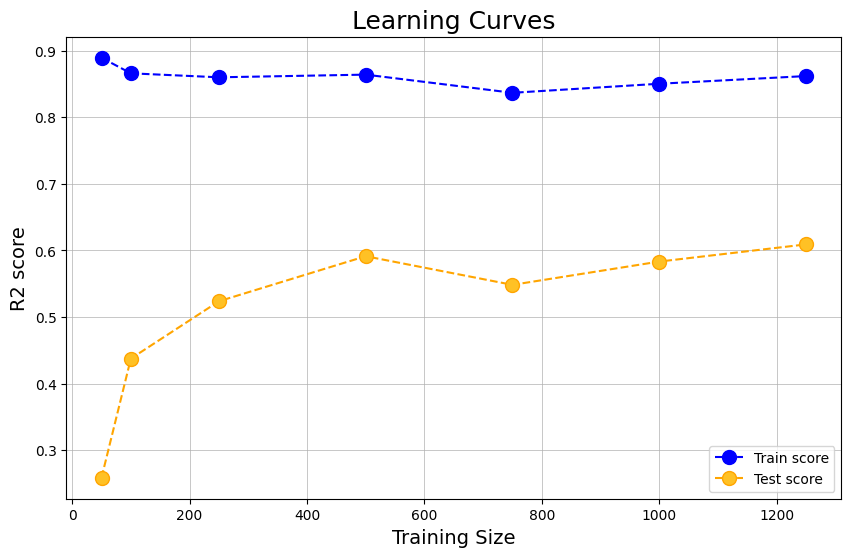

In [50]:
# When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=2),
                                                        X = X_rescaled,
                                                        y = y,
                                                        train_sizes = [50,100,250,500,750,1000,1250],
                                                        cv = 10,
                                                        scoring = 'r2')
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

with plt.style.context('fast'):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)

    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")

    plt.show()

Observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

## (6) Ideal K

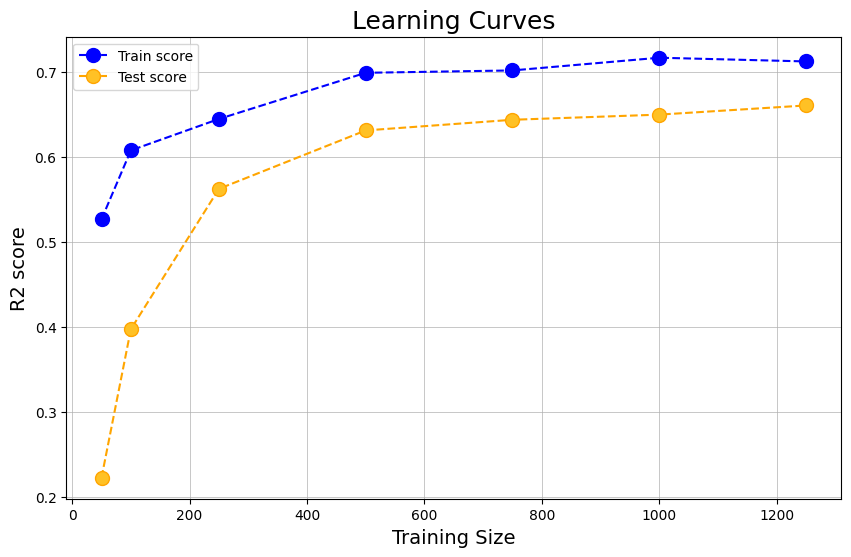

In [51]:
# When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=11),
                                                        X = X_rescaled,
                                                        y = y,
                                                        train_sizes = [50,100,250,500,750,1000,1250],
                                                        cv = 10,
                                                        scoring = 'r2')
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

with plt.style.context('fast'):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)

    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")

    plt.show()

In [57]:
KNN_regressor = KNeighborsRegressor(n_neighbors=11)
cv_results = cross_validate(KNN_regressor, X_rescaled, y, scoring=['neg_mean_absolute_error'])
price_error = cv_results['test_neg_mean_absolute_error'].mean()
price_error

np.float64(-30805.241033623915)

## (7) Model Selection

In [60]:
KNN_regressor = KNeighborsRegressor(n_neighbors=11)
linear_regressor = LinearRegression()

KNN_cv = cross_validate(KNN_regressor, X_rescaled, y)
LR_cv = cross_validate(linear_regressor, X_rescaled, y)

print(KNN_cv['test_score'].mean())
print(LR_cv['test_score'].mean())

0.6572076193027874
0.5944790982110585
